In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/renfe.csv


In [2]:
#Importing Datadet in notebook
df = pd.read_csv('../input/renfe.csv')
df.head(5)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


In [3]:
#Checking for null values
df.isnull().sum()

Unnamed: 0          0
insert_date         0
origin              0
destination         0
start_date          0
end_date            0
train_type          0
price          310681
train_class      9664
fare             9664
dtype: int64

In [4]:
#Finding mean of price to be filled in null places
mean = df.price.mean()
mean

63.38550341776677

In [5]:
#Filling null values of price column
df.price.fillna(63.3855 , inplace = True)
df.isnull().sum()

Unnamed: 0        0
insert_date       0
origin            0
destination       0
start_date        0
end_date          0
train_type        0
price             0
train_class    9664
fare           9664
dtype: int64

In [6]:
# Filling train class coloumn`s null vales with Turista as it was the most common
df.train_class.fillna("Turista" , inplace = True)
df.isnull().sum()

Unnamed: 0        0
insert_date       0
origin            0
destination       0
start_date        0
end_date          0
train_type        0
price             0
train_class       0
fare           9664
dtype: int64

In [7]:
#Filling fare coloumn`s null vales with Promo as it was the most common
df.fare.fillna("Promo" , inplace = True)
df.isnull().sum()

Unnamed: 0     0
insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

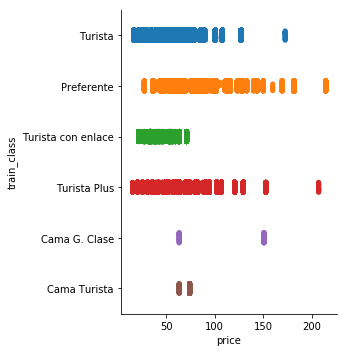

In [8]:
#Categorical chart between price and train class
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='price' , y= 'train_class' , data = df)
plt.show()

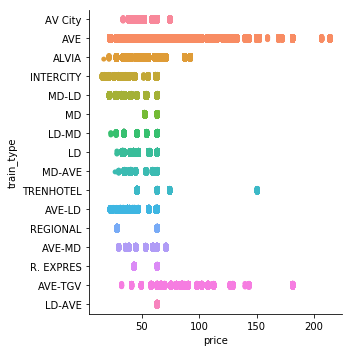

In [9]:
# Categorical graph between price and train type
sns.catplot(x='price' , y= 'train_type' , data = df)
plt.show()

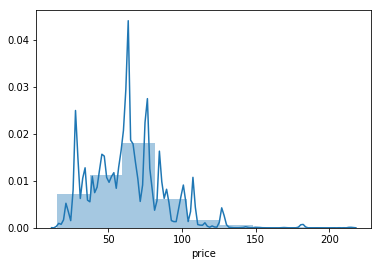

In [10]:
#Graph to show the distribution of price
sns.distplot(df['price'] , bins = 9 , hist = True)
plt.show()

In [11]:
# Deleting useless columns 
del df['insert_date']
del df['start_date']
del df['end_date']
del df ['Unnamed: 0']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579771 entries, 0 to 2579770
Data columns (total 6 columns):
origin         object
destination    object
train_type     object
price          float64
train_class    object
fare           object
dtypes: float64(1), object(5)
memory usage: 118.1+ MB


In [12]:
#Label encoding columns to make model train on it
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['origin'] = label.fit_transform(df['origin'])
df['destination'] = label.fit_transform(df['destination'])
df['train_type'] = label.fit_transform(df['train_type'])
df['train_class'] = label.fit_transform(df['train_class'])
df['fare'] = label.fit_transform(df['fare'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579771 entries, 0 to 2579770
Data columns (total 6 columns):
origin         int64
destination    int64
train_type     int64
price          float64
train_class    int64
fare           int64
dtypes: float64(1), int64(5)
memory usage: 118.1 MB


In [13]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split
train , test = train_test_split(df , test_size = 0.2 , random_state = 1)


In [14]:
#Further splitting
def data_splitting(df):
    x=df.drop(['price'], axis=1)
    y=df['price']
    return x, y
x_train , y_train = data_splitting(train)
x_test , y_test = data_splitting(test)


In [15]:
#Applying Linear regression model
from sklearn.linear_model import LinearRegression
log = LinearRegression()
log.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
log_train = log.score(x_train , y_train)
log_test = log.score(x_test , y_test)

print("Training score :" , log_train)
print("Testing score :" , log_test)


Training score : 0.6218071765564361
Testing score : 0.621738264294444


In [17]:
#Applying Random FOrest Regressor
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train , y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [18]:
reg_train = reg.score(x_train , y_train)
reg_test = reg.score(x_test , y_test)

print("Training Score :" , reg_train)
print("Testing Score :" , reg_test)

Training Score : 0.7995661468865369
Testing Score : 0.8010040981239565
